# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

   Month  Day  Max    Min
0      1    1  NaN    NaN
1      1    2  NaN    NaN
2      1    3  NaN    NaN
3      1    4  NaN    NaN
4      1    5  NaN -155.0


<IPython.core.display.Javascript object>


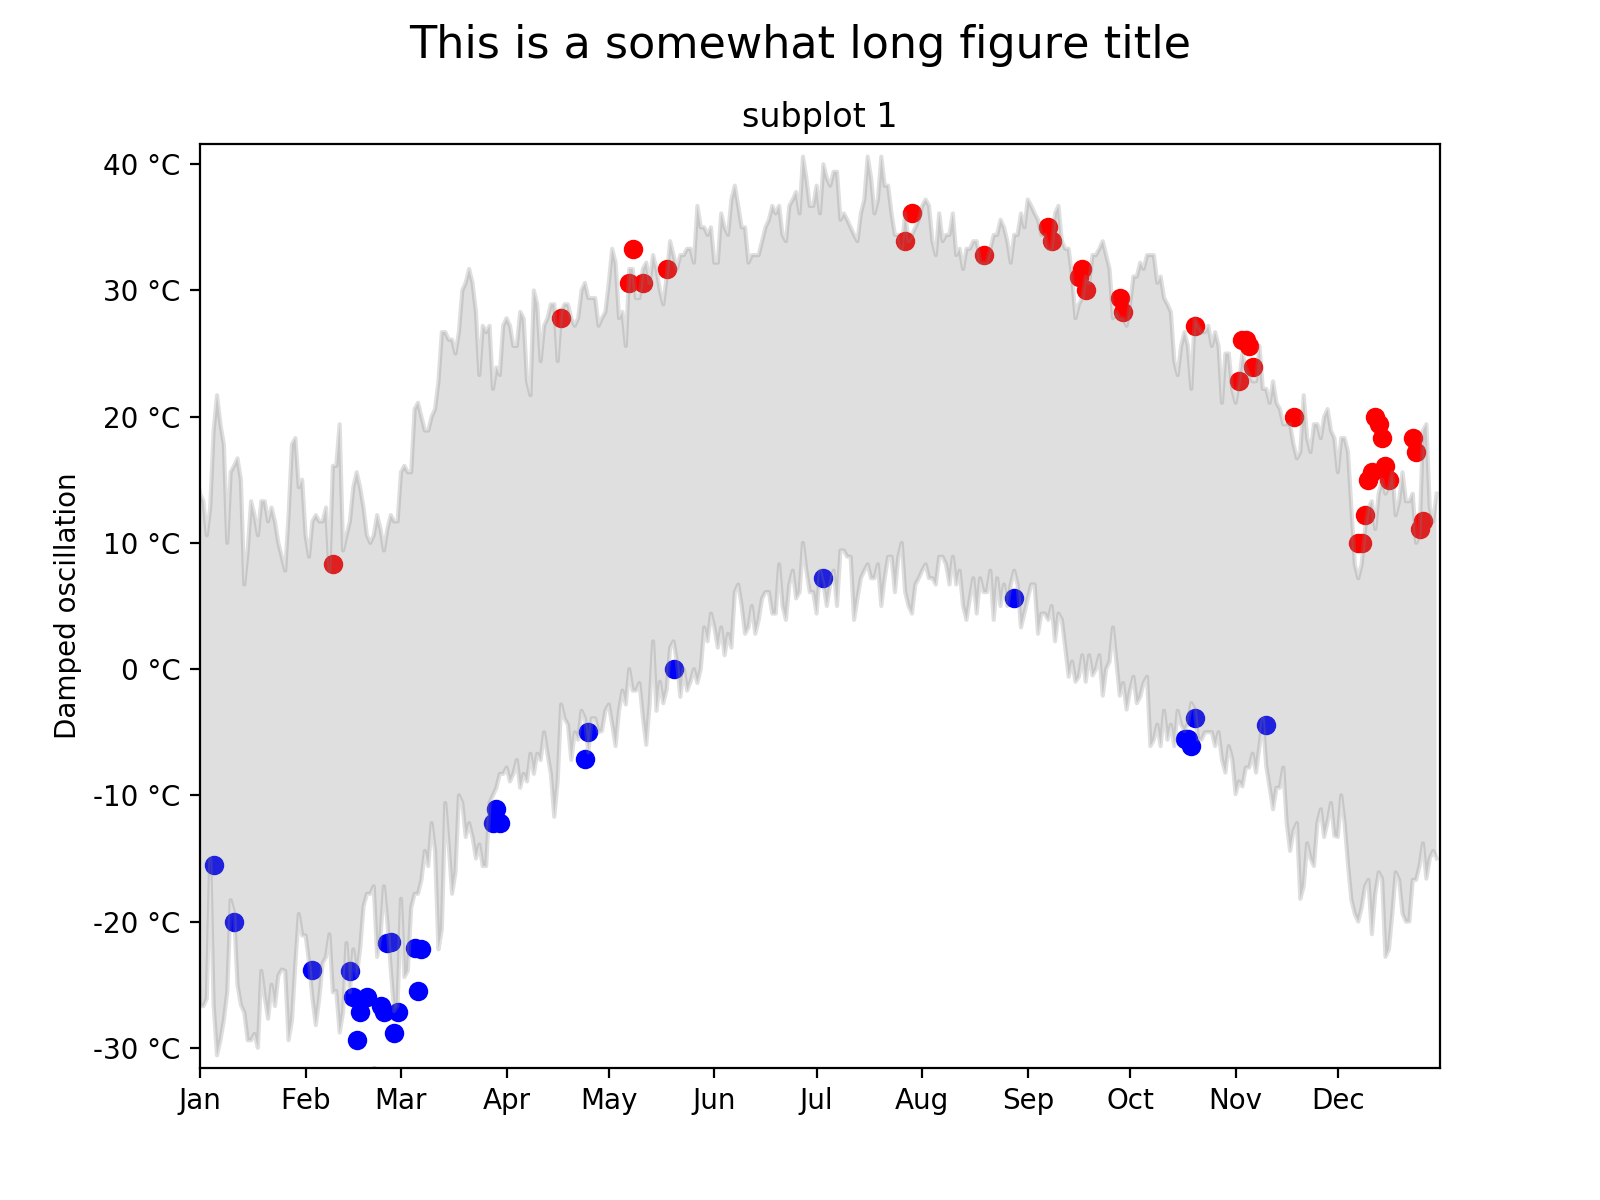

In [18]:
def assignment2(binsize, hashid):
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d{}/{}.csv'.format(binsize, hashid))
    
    # convert date column in df to dtype datetime64
    df['Date'] = pd.DatetimeIndex(df['Date'])
    
    # check the datatypes in df
    # df_dtypes =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]
    # print(df_dtypes)
    
    # split the df into two dataframe, one for 2005-2014, called df_0514 and the 
    # other is for 2015, called df_1515
    df_0514 = df.loc[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2014-12-31')]
    df_1515 = df.loc[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]
    
    # split the Date column into Year, Month and Day colums
    df_0514['Year'] = df_0514['Date'].dt.year
    df_0514['Month'] = df_0514['Date'].dt.month
    df_0514['Day'] = df_0514['Date'].dt.day
    df_1515['Year'] = df_1515['Date'].dt.year
    df_1515['Month'] = df_1515['Date'].dt.month
    df_1515['Day'] = df_1515['Date'].dt.day
    
    # delete all leap year data
    df_0514.drop(df_0514.loc[(df_0514['Month'] == 2) & (df_0514['Day'] == 29)].index, inplace=True)    
    # df_1515.drop(df_1515.loc[(df_1515['Month'] == 2) & (df_1515['Day'] == 29)].index, inplace=True)
    
    # create separate DataFrame for TMAX and TMIN
    df_max_0514 = df_0514.loc[df_0514['Element'] == 'TMAX']
    df_min_0514 = df_0514.loc[df_0514['Element'] == 'TMIN']
    df_max_1515 = df_1515.loc[df_1515['Element'] == 'TMAX']
    df_min_1515 = df_1515.loc[df_1515['Element'] == 'TMIN']
    
    # df_max_0514 = pd.DataFrame(df_max_0514.groupby(['Month', 'Day'])['Data_Value'].max())
    # df_min_0514 = pd.DataFrame(df_min_0514.groupby(['Month', 'Day'])['Data_Value'].min())
    # df_max_0514.reset_index(inplace=True)
    df_minmax_0514 = pd.DataFrame({'Max': df_max_0514.groupby(['Month', 'Day'])['Data_Value'].max(), 
                                   'Min': df_min_0514.groupby(['Month', 'Day'])['Data_Value'].min()})
    df_minmax_0514.reset_index(inplace=True)
    
    df_minmax_1515 = pd.DataFrame({'Max': df_max_1515.groupby(['Month', 'Day'])['Data_Value'].max(),
                                   'Min': df_min_1515.groupby(['Month', 'Day'])['Data_Value'].min()})
    df_minmax_1515.reset_index(inplace=True)
    
    # the result DataFrame
    df_res = pd.DataFrame()
    df_res['Month'] = df_minmax_1515['Month']
    df_res['Day'] = df_minmax_1515['Day']
    df_res['Max'] = list(map(lambda x_0514, x_1515: x_1515 if x_1515 > x_0514 else np.NaN, df_minmax_0514['Max'], df_minmax_1515['Max']))
    df_res['Min'] = list(map(lambda x_0514, x_1515: x_1515 if x_1515 < x_0514 else np.NaN, df_minmax_0514['Min'], df_minmax_1515['Min']))
    
    print(df_res.head())
    
    # print(df_minmax_1515.head())
    
    # df_1515.drop('Day', inplace=True, axis=1)
    # dfg_0514 = df_0514.groupby(['Year', 'Month']).mean()
    # dfg_0514.drop('Day', inplace=True, axis=1)
    
    # print(df_max_0514.head())
    # print(df_min_0514.head())
    # print(df_minmax_0514)
    
    # find dayofyear of first day in each month
    # 2015 is arbitrary, any non-leap year can be used
    xticks = (pd.date_range('1/1/2015', '31/12/2015', freq='M') - 1 + pd.Timedelta('1D')).strftime('%-j').astype(int)
    yticks = list(range((-(-df_minmax_0514['Min'].min() // 100)) * 100, (-(-df_minmax_0514['Max'].max() // 100)) * 100, 100))
    # print(yticks)
    
    xticks_labels = pd.to_datetime(xticks, format='%j').strftime('%b')
    yticks_labels = []
    for yt in yticks:
        yticks_labels.append('{} °C'.format(yt // 10))
    
    # print(yticks_labels)
    
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    
    ax1.set_xlim(1, 365)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticks_labels)
    
    ax1.set_ylim(int(df_minmax_0514['Min'].min()) - 10, int(df_minmax_0514['Max'].max()) + 10)
    ax1.set_yticks(yticks)
    ax1.set_yticklabels(yticks_labels)
    
    # Fix me
    # ax2 = ax1.twinx()
    # yticks2 = list(map(lambda x: ((x / 10) * 1.8) + 32, ax1.get_yticks()))
    # yticks2_labels = []
    # for yt in yticks2:
    #    yticks2_labels.append('{} °F'.format(yt))
    # ax2.set_yticks(yticks2)
    # ax2.set_yticklabels(yticks2_labels)
    # print(yticks2)
    # print(yticks2_labels)
    # print(yticks)
    # print(yticks2)
    
    plt.plot(df_minmax_0514['Max'], 'gray', alpha=0.25)
    plt.plot(df_minmax_0514['Min'], 'gray', alpha=0.25)
    plt.scatter(list(range(1, 366)), df_res['Max'], c='red')
    plt.scatter(list(range(1, 366)), df_res['Min'], c='blue')
    plt.fill_between(range(len(df_minmax_0514['Min'])), df_minmax_0514['Min'], df_minmax_0514['Max'], facecolor='gray', alpha=0.25)
    # plt.grid(True)
    plt.show()
    
    
    
    
    
    # print(s_0514)
    

assignment2(400, 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

<IPython.core.display.Javascript object>


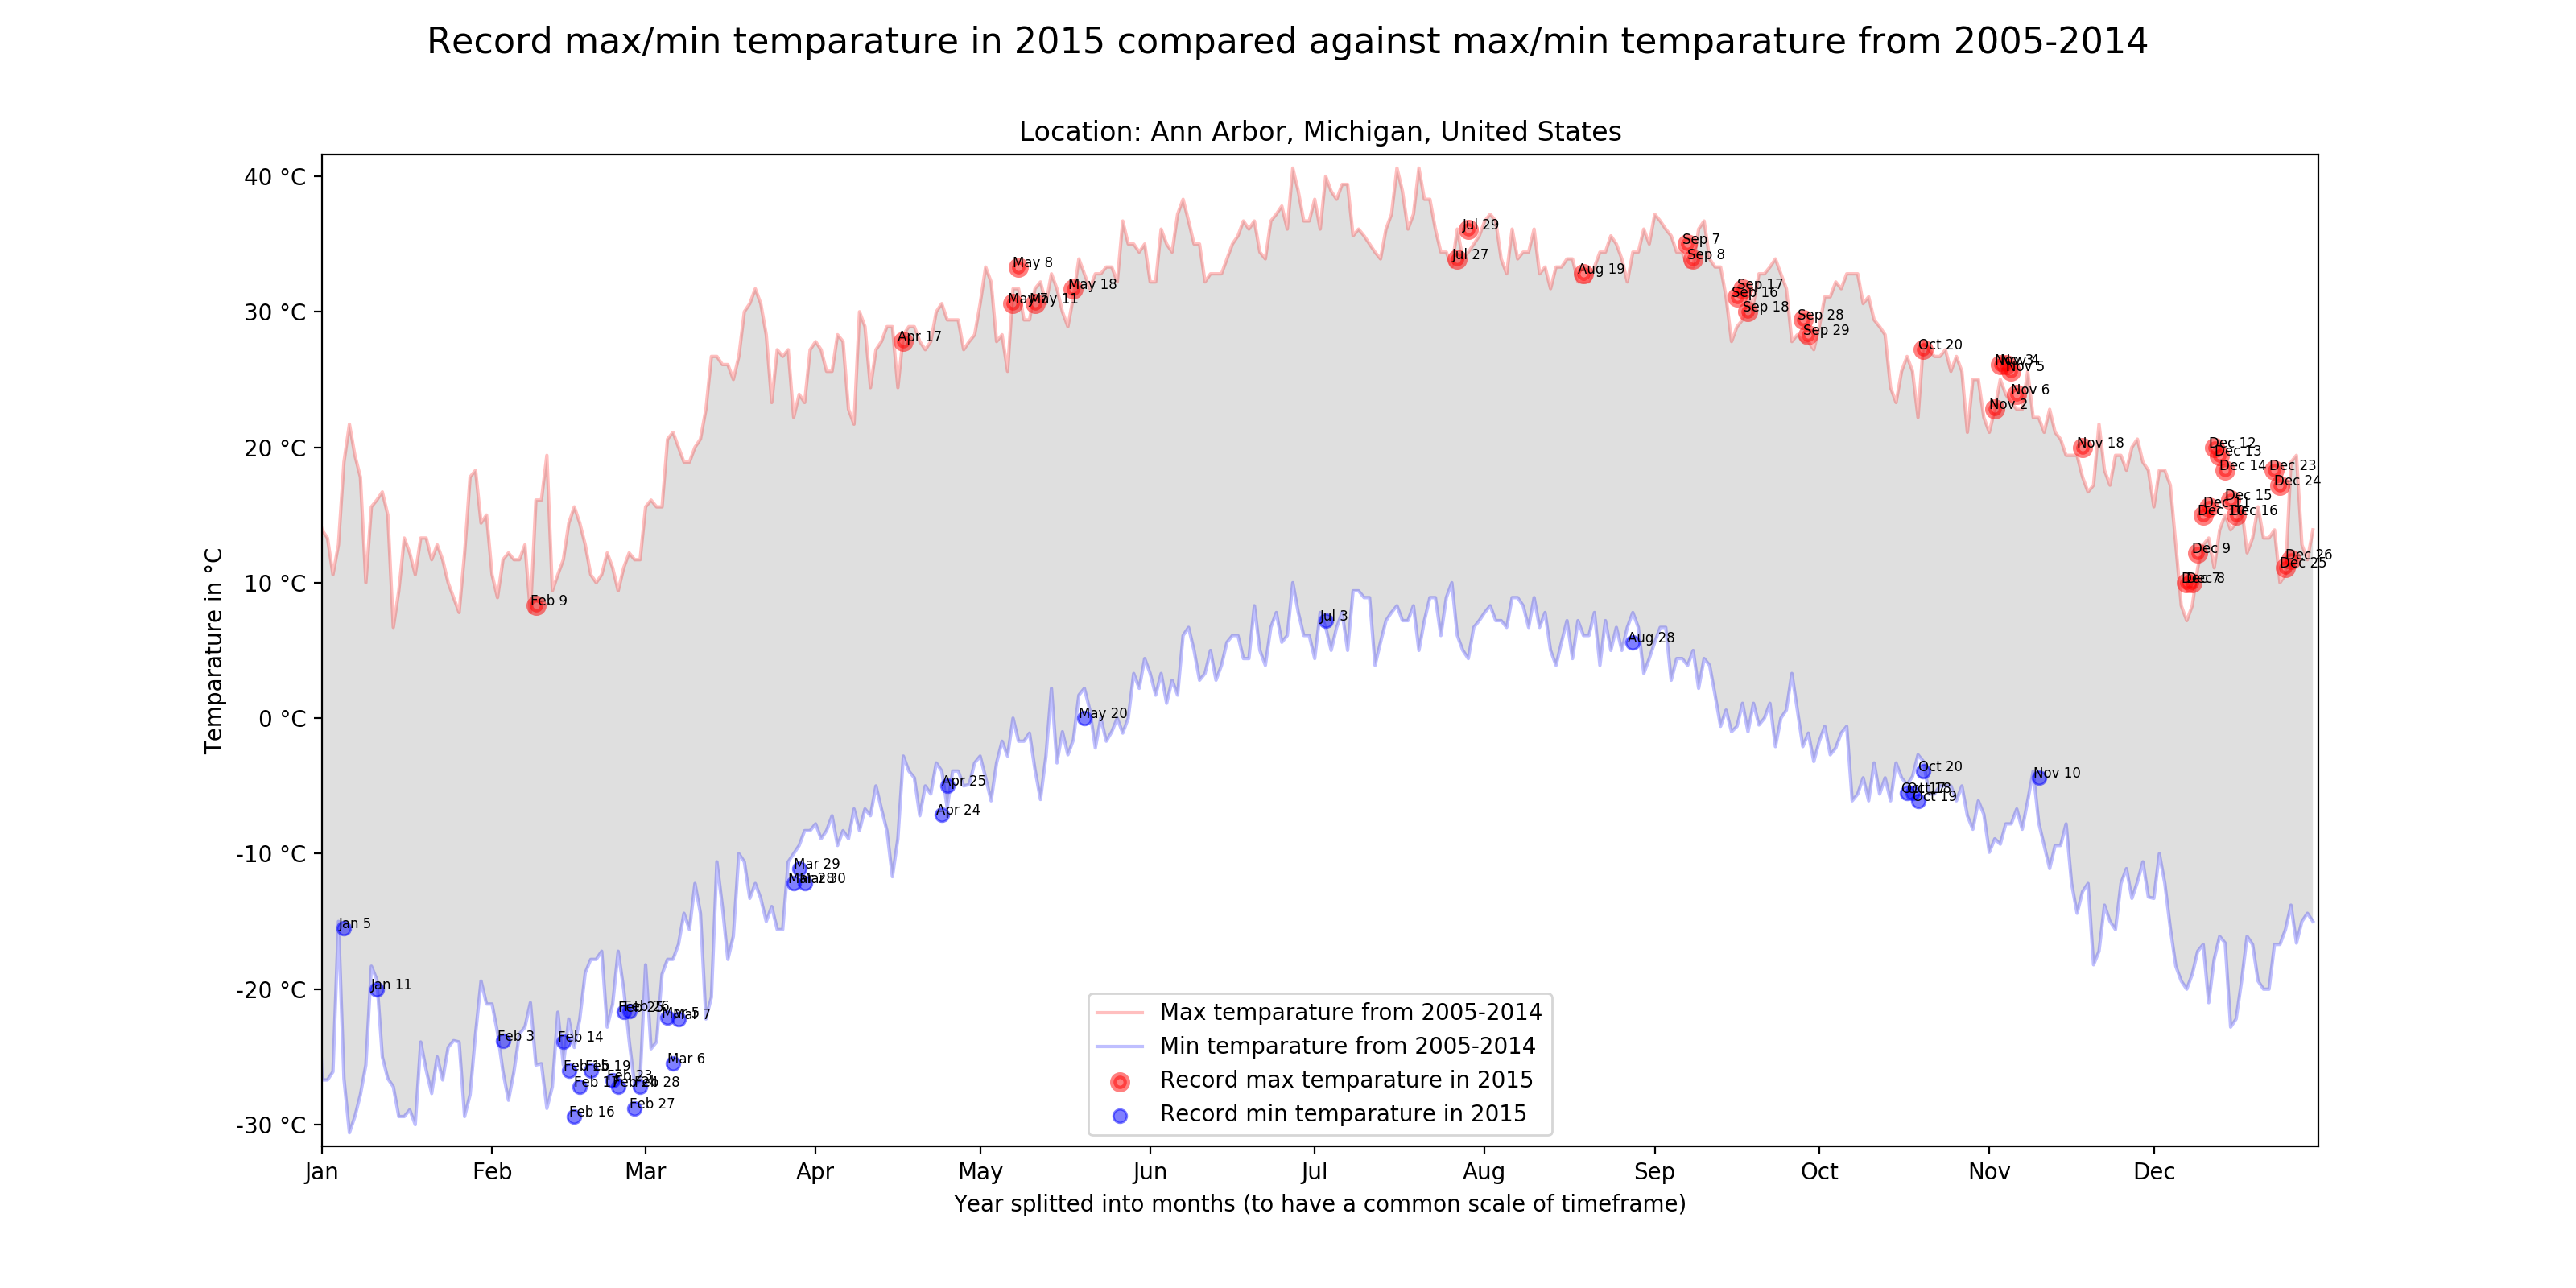

In [80]:
# just the cleaned up version

import calendar

def assignment2(binsize, hashid):
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d{}/{}.csv'.format(binsize, hashid))
    
    # convert date column in df to dtype datetime64
    df['Date'] = pd.DatetimeIndex(df['Date'])
    
    # split the df into two dataframe, one for 2005-2014, called df_0514 and the 
    # other is for 2015, called df_1515
    df_0514 = df.loc[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2014-12-31')]
    df_1515 = df.loc[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]
    
    # split the Date column into Year, Month and Day colums
    df_0514['Year'] = df_0514['Date'].dt.year
    df_0514['Month'] = df_0514['Date'].dt.month
    df_0514['Day'] = df_0514['Date'].dt.day
    df_1515['Year'] = df_1515['Date'].dt.year
    df_1515['Month'] = df_1515['Date'].dt.month
    df_1515['Day'] = df_1515['Date'].dt.day
    
    # delete all leap year data
    df_0514.drop(df_0514.loc[(df_0514['Month'] == 2) & (df_0514['Day'] == 29)].index, inplace=True)
    
    # create separate DataFrame for TMAX and TMIN
    df_max_0514 = df_0514.loc[df_0514['Element'] == 'TMAX']
    df_min_0514 = df_0514.loc[df_0514['Element'] == 'TMIN']
    df_max_1515 = df_1515.loc[df_1515['Element'] == 'TMAX']
    df_min_1515 = df_1515.loc[df_1515['Element'] == 'TMIN']
    
    # create separate DataFrame for min, max temparature value for 2005-2014
    df_minmax_0514 = pd.DataFrame({'Max': df_max_0514.groupby(['Month', 'Day'])['Data_Value'].max(), 
                                   'Min': df_min_0514.groupby(['Month', 'Day'])['Data_Value'].min()})
    df_minmax_0514.reset_index(inplace=True)
    
    # create separate DataFrame for min, max temparature value for 2015
    df_minmax_1515 = pd.DataFrame({'Max': df_max_1515.groupby(['Month', 'Day'])['Data_Value'].max(),
                                   'Min': df_min_1515.groupby(['Month', 'Day'])['Data_Value'].min()})
    df_minmax_1515.reset_index(inplace=True)
    
    # the result DataFrame
    df_res = pd.DataFrame()
    df_res['Month'] = df_minmax_1515['Month']
    df_res['Day'] = df_minmax_1515['Day']
    df_res['Max'] = list(map(lambda x_0514, x_1515: x_1515 if x_1515 > x_0514 else np.NaN, df_minmax_0514['Max'], df_minmax_1515['Max']))
    df_res['Min'] = list(map(lambda x_0514, x_1515: x_1515 if x_1515 < x_0514 else np.NaN, df_minmax_0514['Min'], df_minmax_1515['Min']))
    
    # begin with graph preparation
    # find dayofyear of first day in each month
    # 2015 is arbitrary, any non-leap year can be used
    xticks = (pd.date_range('1/1/2015', '31/12/2015', freq='M') - 1 + pd.Timedelta('1D')).strftime('%-j').astype(int)
    yticks = list(range((-(-df_minmax_0514['Min'].min() // 100)) * 100, (-(-df_minmax_0514['Max'].max() // 100)) * 100, 100))
    
    xticks_labels = pd.to_datetime(xticks, format='%j').strftime('%b')
    yticks_labels = []
    for yt in yticks:
        yticks_labels.append('{} °C'.format(yt // 10))
    
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    
    ax1.set_xlim(1, 365)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticks_labels)
    
    ax1.set_ylim(int(df_minmax_0514['Min'].min()) - 10, int(df_minmax_0514['Max'].max()) + 10)
    ax1.set_yticks(yticks)
    ax1.set_yticklabels(yticks_labels)
    
    # draw the line chart
    line_max, = plt.plot(df_minmax_0514['Max'], 'red', alpha=0.25, label='Max temparature from 2005-2014')
    line_min, = plt.plot(df_minmax_0514['Min'], 'blue', alpha=0.25, label='Min temparature from 2005-2014')
    plt.fill_between(range(len(df_minmax_0514['Min'])), df_minmax_0514['Min'], df_minmax_0514['Max'], facecolor='gray', alpha=0.25)
    
    # draw the scatter plot
    scatter_max = plt.scatter(list(range(1, 366)), df_res['Max'], c='red', alpha=0.5, label='Record max temparature in 2015', lw=3)
    scatter_min = plt.scatter(list(range(1, 366)), df_res['Min'], c='blue', alpha=0.5, label='Record min temparature in 2015')
    
    # add the annotation for days when the record temparature was broken
    for i in range(0, len(df_res)):
        if df_res.iloc[i]['Max'] is not np.NaN:
            ax1.annotate(calendar.month_name[int(df_res.iloc[i]['Month'])][:3] + ' ' + str(int(df_res.iloc[i]['Day'])), (i, df_res.iloc[i]['Max']), 
                         fontsize=6)
    
    for i in range(0, len(df_res)):
        if df_res.iloc[i]['Min'] is not np.NaN:
            ax1.annotate(calendar.month_name[int(df_res.iloc[i]['Month'])][:3] + ' ' + str(int(df_res.iloc[i]['Day'])), (i, df_res.iloc[i]['Min']), 
                         fontsize=6)
    
    plt.legend(handles=[line_max, line_min, scatter_max, scatter_min], loc=8)
    # plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    
    plt.title('Location: Ann Arbor, Michigan, United States')
    plt.ylabel('Temparature in °C')
    plt.xlabel('Year splitted into months (to have a common scale of timeframe)')
    plt.suptitle('Record max/min temparature in 2015 compared against max/min temparature from 2005-2014', fontsize=16)
    
    # plt.show()

assignment2(400, 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')